<a href="https://colab.research.google.com/github/briankosiadi/Capstone-4/blob/master/Lung_Cancer_Neural_Networks_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a continuation from the previous notebook, the first several cells consists of imports and data mounting.

In [0]:
try: 
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

print("Version: ", tf.version)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TensorFlow 2.x selected.
Version:  <module 'tensorflow_core._api.v2.version' from '/tensorflow-2.1.0/python3.6/tensorflow_core/_api/v2/version/__init__.py'>
Eager mode:  True
GPU is available


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import os
import cv2
import glob
import shutil
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization, LayerNormalization
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import autokeras as ak
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings("ignore")

In [0]:
train_data_dir = '/content/drive/My Drive/Thinkful Datasets/final_images/train/'
test_data_dir = '/content/drive/My Drive/Thinkful Datasets/final_images/test/'

In [0]:
img_width, img_height = 250, 250
batch_size = 40

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.3,
    zoom_range=.1,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255,)

In [0]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    #shuffle=False,
    class_mode='binary')

Found 616 images belonging to 2 classes.
Found 264 images belonging to 2 classes.


In [0]:
train_len = (len(glob.glob('/content/drive/My Drive/Thinkful Datasets/final_images/train/positives/*.png'))
  +len(glob.glob('/content/drive/My Drive/Thinkful Datasets/final_images/train/negatives/*.png')))
print(train_len)

616


In [0]:
test_len = (len(glob.glob('/content/drive/My Drive/Thinkful Datasets/final_images/test/positives/*.png'))
  +len(glob.glob('/content/drive/My Drive/Thinkful Datasets/final_images/test/negatives/*.png')))
print(test_len)

264


<h2>
4. Model Evaluation
</h2>

I saved my model to drive and load it here. I also try using the autokeras model but it clearly isn't performing as well as it should be.

In [0]:
model = load_model('/content/drive/My Drive/Capstone 4/best_model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 250, 250, 3)]     0         
_________________________________________________________________
batch_normalization (BatchNo (None, 250, 250, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 244, 244, 32)      4736      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 242, 242, 16)      4624      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 121, 121, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 119, 119, 16)      2320      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 117, 117, 8)       1160  

In [0]:
auto_model = load_model('/content/drive/My Drive/Capstone 4/best_model.h5')

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
history = model.fit(
    train_generator,
    steps_per_epoch = 15,
    epochs=25,
    validation_data = validation_generator,
    validation_steps = 5)

Epoch 1/25
15/15 [==============================] - 488s 33s/step - loss: 0.6755 - acc: 0.5816 - val_loss: 0.7002 - val_acc: 0.5100
Epoch 2/25
15/15 [==============================] - 22s 1s/step - loss: 0.6627 - acc: 0.6285 - val_loss: 0.7040 - val_acc: 0.5100
Epoch 3/25
15/15 [==============================] - 20s 1s/step - loss: 0.6739 - acc: 0.5990 - val_loss: 0.7281 - val_acc: 0.5100
Epoch 4/25
15/15 [==============================] - 20s 1s/step - loss: 0.6480 - acc: 0.6250 - val_loss: 0.7030 - val_acc: 0.5100
Epoch 5/25
15/15 [==============================] - 20s 1s/step - loss: 0.6689 - acc: 0.6150 - val_loss: 0.6987 - val_acc: 0.5100
Epoch 6/25
15/15 [==============================] - 19s 1s/step - loss: 0.6682 - acc: 0.6268 - val_loss: 0.6912 - val_acc: 0.5100
Epoch 7/25
15/15 [==============================] - 20s 1s/step - loss: 0.6719 - acc: 0.6319 - val_loss: 0.6897 - val_acc: 0.5100
Epoch 8/25
15/15 [==============================] - 21s 1s/step - loss: 0.6549 - acc: 0.

In [0]:
auto_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
auto_history = auto_model.fit(
    train_generator,
    steps_per_epoch = 15,
    epochs=25,
    validation_data = validation_generator,
    validation_steps = 5)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 15 steps, validate for 5 steps
Epoch 1/25
15/15 [==============================] - 518s 35s/step - loss: 0.6691 - accuracy: 0.6059 - val_loss: 0.7173 - val_accuracy: 0.5200
Epoch 2/25
15/15 [==============================] - 33s 2s/step - loss: 0.6595 - accuracy: 0.6285 - val_loss: 0.6940 - val_accuracy: 0.5200
Epoch 3/25
15/15 [==============================] - 21s 1s/step - loss: 0.6595 - accuracy: 0.6372 - val_loss: 0.7063 - val_accuracy: 0.5150
Epoch 4/25
15/15 [==============================] - 20s 1s/step - loss: 0.6606 - accuracy: 0.6094 - val_loss: 0.6992 - val_accuracy: 0.5150
Epoch 5/25
15/15 [==============================] - 20s 1s/step - loss: 0.6653 - accuracy: 0.6267 - val_loss: 0.6917 - val_accuracy: 0.5300
Epoch 6/25
15/15 [==============================] - 21s 1s/step - loss: 0.6610 - accuracy: 0.6319 - val_loss: 0.7409 - val_accuracy: 0.5250
Epoch 7/25
15/15 [==============================] - 21s 1s/step - l

In [0]:
model.evaluate(validation_generator)

  ...
    to  
  ['...']
7/7 [==============================] - 4s 608ms/step - loss: 0.7180 - accuracy: 0.5530


[0.7179664373397827, 0.5530303]

In [0]:
model.evaluate(train_generator)

  ...
    to  
  ['...']
16/16 [==============================] - 17s 1s/step - loss: 0.6559 - accuracy: 0.6429


[0.6559196971356869, 0.64285713]

In [0]:
auto_model.evaluate(validation_generator)

  ...
    to  
  ['...']
7/7 [==============================] - 4s 618ms/step - loss: 0.7099 - accuracy: 0.5341


[0.7099084683826992, 0.53409094]

In [0]:
auto_model.evaluate(train_generator)

  ...
    to  
  ['...']
16/16 [==============================] - 17s 1s/step - loss: 0.6471 - accuracy: 0.6461


[0.6471056267619133, 0.6461039]

In [0]:
history.history

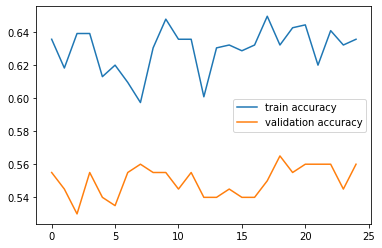

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
labels = ('train accuracy', 'validation accuracy')
plt.legend(labels)

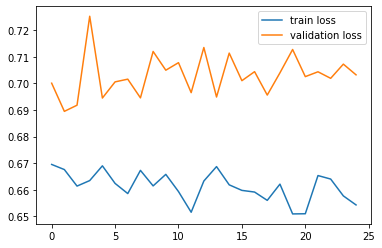

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
labels = ('train loss', 'validation loss')
plt.legend(labels)

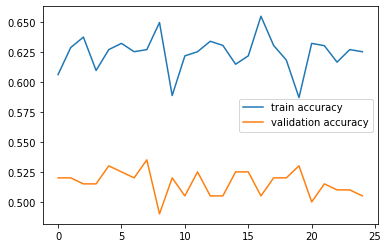

In [0]:
plt.plot(auto_history.history['accuracy'])
plt.plot(auto_history.history['val_accuracy'])
labels = ('train accuracy', 'validation accuracy')
plt.legend(labels)

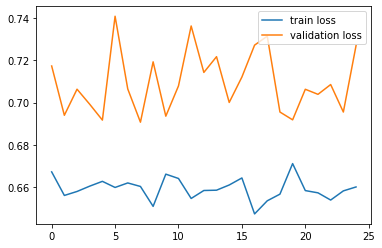

In [0]:
plt.plot(auto_history.history['loss'])
plt.plot(auto_history.history['val_loss'])
labels = ('train loss', 'validation loss')
plt.legend(labels)

As we can see, my custom model was able to have up to 55% accuracy on validation data, which while isn't as great as I hoped for, is still better than 50%. Autokeras' model still isn't reaching the 70% validation accuracy that it was supposed to hit, which I will continue to look into.

<h2>
5. Model Interaction
</h2>

For practicality, I create a function that allows the user to upload a chest radiograph image that the function displays and also returns a prediction of diagnosis.

In [0]:
from google.colab import files
from IPython.display import Image
from google.colab.patches import cv2_imshow

In [0]:
import os
!ls
os.getcwd()

'positive_example (1).png'   sample_data


'/content'

In [0]:
def predict_image():
  uploaded = files.upload()
  full_path = "/content/" + list(uploaded.keys())[0]
  image = cv2.imread(full_path)
  image = cv2.resize(image, (250, 250))
  img_array = np.expand_dims(image, axis=0)
  if model.predict(img_array)[0][0] >= .5:
    print('Positive')
  else:
    print('Negative')
  cv2_imshow(image)
  os.system(f'rm {full_path}')

Saving negative_example_2.png to negative_example_2.png
Negative


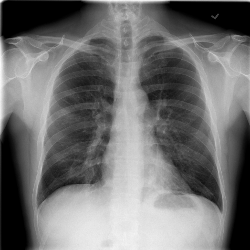

In [0]:
predict_image

<h2>
6. Conclusion
</h2>

Overall, this project taught me a lot about day-to-day problems that data scientists will face. I expected most of my efforts to be focused on tuning my model performance, and while I did spend a good amount of time on that, I had to deal with unexpected issues too. Working with image data took the entire first week to preprocess and load, which speaks to the computational power required to work with image data. I also ran into problems with autokeras, and had to learn how to work around that. All in all, I hope to continue to tune my model to reach even higher performance, making it even more usable in the medical field.